<a href="https://colab.research.google.com/github/sabbir-ahmed16/neural-and-fuzzy-sessional/blob/main/1608012_ETE_456_R02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- **To predict whether a person will suffer stroke or not.**

## Objectives
- To get familiar with exploratory data analysis using various packages.
- To get familiar with various classification algorithms.
- To learn about different performance metrics for classification algorithms.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and Reading the Dataset

In [ ]:
dataset = pd.read_csv(https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=1)

In [ ]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
dataset_clean = dataset.dropna()
dataset_clean.reset_index(drop=True, inplace=True)
dataset_clean.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
print(f'Gender: {dataset_clean["gender"].unique()}')
print(f'Marital status: {dataset_clean["ever_married"].unique()}')
print(f'Work type: {dataset_clean["work_type"].unique()}')
print(f'Residence type: {dataset_clean["Residence_type"].unique()}')
print(f'Smoking status: {dataset_clean["smoking_status"].unique()}')

Gender: ['Male' 'Female' 'Other']
Marital status: ['Yes' 'No']
Work type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence type: ['Urban' 'Rural']
Smoking status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
all_features = dataset_clean.drop(['id', 'stroke'], axis=1)
numeric_features = all_features.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
target = dataset_clean['stroke']

## Encoding the Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [ ]:
le_gender = pd.DataFrame(le.fit_transform(all_features['gender']))
le_maritalStatus = pd.DataFrame(le.fit_transform(all_features['ever_married']))
le_workType = pd.DataFrame(le.fit_transform(all_features['work_type']))
le_residenceType = pd.DataFrame(le.fit_transform(all_features['Residence_type']))
le_smokingStatus = pd.DataFrame(le.fit_transform(all_features['smoking_status']))

In [ ]:
le_features = pd.concat([numeric_features,le_gender,le_maritalStatus,le_workType,le_residenceType,le_smokingStatus], axis=1)

In [ ]:
le_features.columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'ever_married',
                       'work_type', 'Residence_type', 'smoking_status']          
le_features.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,2,1,1
1,80.0,0,1,105.92,32.5,1,1,2,0,2
2,49.0,0,0,171.23,34.4,0,1,2,1,3
3,79.0,1,0,174.12,24.0,0,1,3,0,2
4,81.0,0,0,186.21,29.0,1,1,2,1,1


In [ ]:
import klib

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

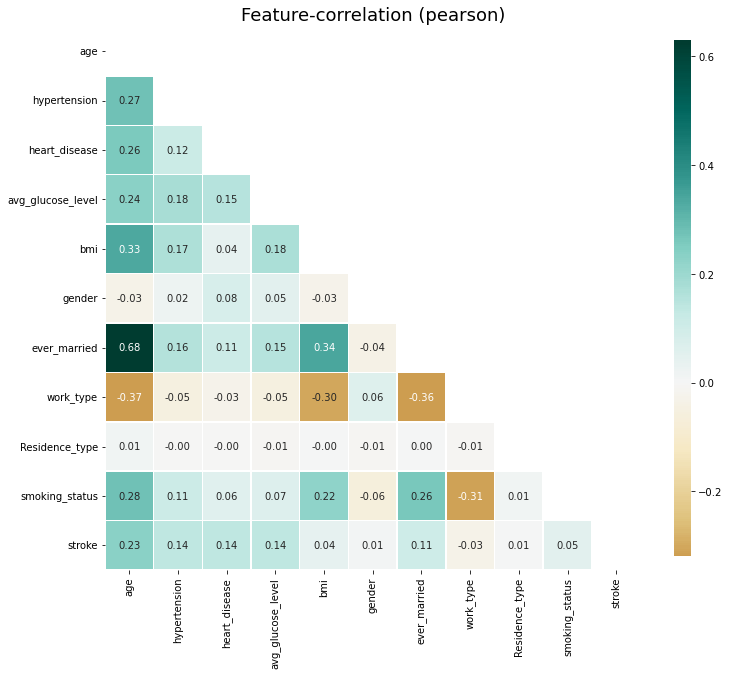

In [ ]:
klib.corr_plot(pd.concat([le_features, target], axis=1))

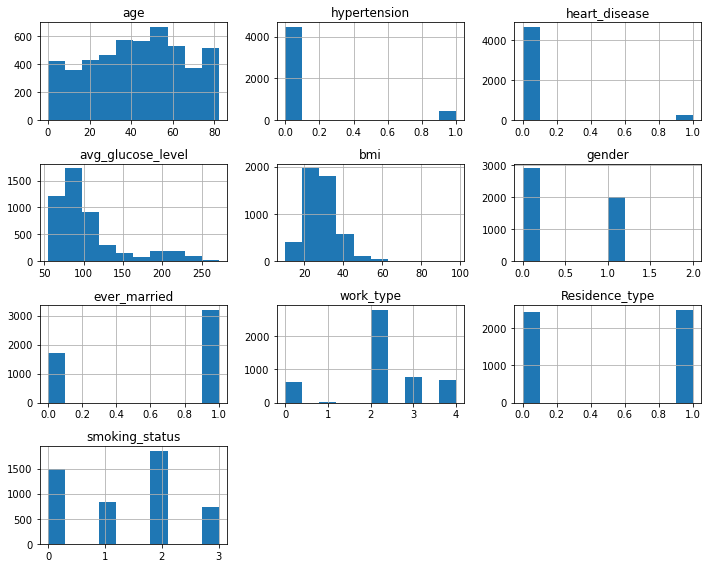

In [ ]:
# Displaying feature histogram
fig = le_features.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
enc = pd.DataFrame(ohe.fit_transform(all_features[['gender', 'ever_married', 'work_type', 'Residence_type', 
                                                            'smoking_status']]))
enc.columns = ohe.get_feature_names_out(['gender','ever_married','work_type','Residence_type','smoking_status'])
ohe_features = pd.concat([numeric_features, enc], axis=1)

In [ ]:
ohe_features.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


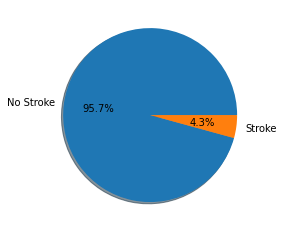

Number of no stroke cases: 4700
Number of stroke cases: 209


In [ ]:
# Target Class Distribution
classes = dataset_clean['stroke'].value_counts()
class_labels = ['No Stroke', 'Stroke']

plt.pie(classes, labels=class_labels, shadow=True, autopct='%1.1f%%', startangle=0)
plt.plot('Class Distribution')
plt.show()

print(f'Number of no stroke cases: {classes[0]}')
print(f'Number of stroke cases: {classes[1]}')

<i>**<font color="red">The class distribution plot shows that dataset is imbalanced. That means, number `Stroke` of cases are very neglible compared to that of the `No Stroke` cases.</font>**</i><br>
- There are a number of ways for handling imbalanced data [Link](https://heartbeat.comet.ml/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa) e.g. 
  - Collecting more data
  - Changing the performance metric
  - Using penalized model
  - Resampling
    - Oversampling
      - Random Oversampling
      - SMOTE Oversampling
      - ADASYN Oversampling etc.
    - Undersampling
      - Random Undersampling
      - NearMiss Undersampling
      - Undersampling with Tomek Links
      - Undersampling with Cluster Centroids
      - Undersampling with Edited Nearest Neighbor Rule
      - Undersampling with Neighborhood Cleaning Rule
- In this exercise, oversampling has been used to increase the number of samples for stroke cases.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
leX, ley = smote.fit_resample(le_features, target)
oheX, ohey = smote.fit_resample(ohe_features, target)

print(leX.shape)
print(ley.shape)

print(oheX.shape)
print(ohey.shape)

(9400, 10)
(9400,)
(9400, 21)
(9400,)


## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
leX_train, leX_test, ley_train, ley_test = train_test_split(leX, ley, test_size=0.2, random_state=4)
oheX_train, oheX_test, ohey_train, ohey_test = train_test_split(oheX, ohey, test_size=0.2, random_state=4)

print(leX_train.shape)
print(leX_test.shape)

print(oheX_train.shape)
print(oheX_test.shape)

(7520, 10)
(1880, 10)
(7520, 21)
(1880, 21)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
le_scaler = StandardScaler()
ohe_scaler = StandardScaler()

lenX_train = le_scaler.fit_transform(leX_train)
lenX_test = le_scaler.transform(leX_test)

ohenX_train = ohe_scaler.fit_transform(oheX_train)
ohenX_test = ohe_scaler.transform(oheX_test)

## Performance Metrics
- Performance metrics provide a measure of how well a trained model performs on unknown data
- There are a number of performance metrics. e.g.
  - Sensitivity, specificity and area under curve (AUC)
  - Precision, recall and f1-score

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Training Models

### Logistic Regresssion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# FOR LABEL ENCODED DATA
le_logistic_model = LogisticRegression(solver='lbfgs', random_state=4)
le_logistic_model.fit(lenX_train, ley_train)
le_log_pred = le_logistic_model.predict(lenX_test)

In [ ]:
# FOR ONE-HOT ENCODED DATA
ohe_logistic_model = LogisticRegression(solver='lbfgs', random_state=4)
ohe_logistic_model.fit(ohenX_train, ohey_train)
ohe_log_pred = ohe_logistic_model.predict(ohenX_test)

In [ ]:
# FOR LABEL ENCODED DATA
print(f'Classification Report: \n{classification_report(ley_test, le_log_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_log_pred)}')

le_acc_log = accuracy_score(ley_test, le_log_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_log:.2f}')

le_prec_log = precision_score(ley_test, le_log_pred)
le_rec_log = recall_score(ley_test, le_log_pred)
le_f1_log = f1_score(ley_test, le_log_pred)

print(f'Precision score: {le_prec_log:.2f}')
print(f'Recall score: {le_rec_log:.2f}')
print(f'F1-score: {le_f1_log:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       921
           1       0.78      0.80      0.79       959

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880

Confusion Matrix: 
[[706 215]
 [194 765]]
Accuracy of Logistic Regression Model: 0.78
Precision score: 0.78
Recall score: 0.80
F1-score: 0.79


In [ ]:
# FOR ONE-HOT ENCODED DATA
print(f'Classification Report: \n{classification_report(ohey_test, ohe_log_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_log_pred)}')

ohe_acc_log = accuracy_score(ohey_test, ohe_log_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_log:.2f}')

ohe_prec_log = precision_score(ohey_test, ohe_log_pred)
ohe_rec_log = recall_score(ohey_test, ohe_log_pred)
ohe_f1_log = f1_score(ohey_test, ohe_log_pred)

print(f'Precision score: {ohe_prec_log:.2f}')
print(f'Recall score: {ohe_rec_log:.2f}')
print(f'F1-score: {ohe_f1_log:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       921
           1       0.76      0.81      0.78       959

    accuracy                           0.77      1880
   macro avg       0.77      0.77      0.77      1880
weighted avg       0.77      0.77      0.77      1880

Confusion Matrix: 
[[676 245]
 [185 774]]
Accuracy of Logistic Regression Model: 0.77
Precision score: 0.76
Recall score: 0.81
F1-score: 0.78


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# FOR LABEL ENCODED DATA
le_svm_model = SVC(kernel = 'linear', random_state=4, C=1)
le_svm_model.fit(lenX_train, ley_train)
le_svm_pred = le_svm_model.predict(lenX_test)

In [ ]:
# FOR OHE-HOT ENCODED DATA
ohe_svm_model = SVC(kernel = 'linear', random_state=4, C=1)
ohe_svm_model.fit(ohenX_train, ohey_train)
ohe_svm_pred = ohe_svm_model.predict(ohenX_test)

In [ ]:
print(f'Classification Report: \n{classification_report(ley_test, le_svm_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_svm_pred)}')

le_acc_svm = accuracy_score(ley_test, le_svm_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_svm:.2f}')

le_prec_svm = precision_score(ley_test, le_svm_pred)
le_rec_svm = recall_score(ley_test, le_svm_pred)
le_f1_svm = f1_score(ley_test, le_svm_pred)


print(f'Precision score: {le_prec_svm:.2f}')
print(f'Recall score: {le_rec_svm:.2f}')
print(f'F1-score: {le_f1_svm:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       921
           1       0.78      0.80      0.79       959

    accuracy                           0.79      1880
   macro avg       0.79      0.79      0.79      1880
weighted avg       0.79      0.79      0.79      1880

Confusion Matrix: 
[[708 213]
 [188 771]]
Accuracy of Logistic Regression Model: 0.79
Precision score: 0.78
Recall score: 0.80
F1-score: 0.79


In [ ]:
print(f'Classification Report: \n{classification_report(ohey_test, ohe_svm_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_svm_pred)}')

ohe_acc_svm = accuracy_score(ohey_test, ohe_svm_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_svm:.2f}')

ohe_prec_svm = precision_score(ohey_test, ohe_svm_pred)
ohe_rec_svm = recall_score(ohey_test, ohe_svm_pred)
ohe_f1_svm = f1_score(ohey_test, ohe_svm_pred)


print(f'Precision score: {ohe_prec_svm:.2f}')
print(f'Recall score: {ohe_rec_svm:.2f}')
print(f'F1-score: {ohe_f1_svm:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       921
           1       0.76      0.82      0.79       959

    accuracy                           0.78      1880
   macro avg       0.78      0.77      0.77      1880
weighted avg       0.78      0.78      0.77      1880

Confusion Matrix: 
[[668 253]
 [170 789]]
Accuracy of Logistic Regression Model: 0.78
Precision score: 0.76
Recall score: 0.82
F1-score: 0.79


### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# FOR LABEL ENCODED DATA
le_knn_model = KNeighborsClassifier(n_neighbors=7)
le_knn_model.fit(lenX_train, ley_train)
le_knn_pred = le_knn_model.predict(lenX_test)

In [ ]:
# FOR ONE-HOT ENCODED DATA
ohe_knn_model = KNeighborsClassifier(n_neighbors=7)
ohe_knn_model.fit(ohenX_train, ohey_train)
ohe_knn_pred = ohe_knn_model.predict(ohenX_test)

In [ ]:
# FOR LABEL ENCODED DATA
print(f'Classification Report: \n{classification_report(ley_test, le_knn_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_knn_pred)}')

le_acc_knn = accuracy_score(ley_test, le_knn_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_knn:.2f}')

le_prec_knn = precision_score(ley_test, le_knn_pred)
le_rec_knn = recall_score(ley_test, le_knn_pred)
le_f1_knn = f1_score(ley_test, le_knn_pred)


print(f'Precision score: {le_prec_knn:.2f}')
print(f'Recall score: {le_rec_knn:.2f}')
print(f'F1-score: {le_f1_knn:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       921
           1       0.84      0.94      0.88       959

    accuracy                           0.87      1880
   macro avg       0.88      0.87      0.87      1880
weighted avg       0.88      0.87      0.87      1880

Confusion Matrix: 
[[744 177]
 [ 61 898]]
Accuracy of Logistic Regression Model: 0.87
Precision score: 0.84
Recall score: 0.94
F1-score: 0.88


In [ ]:
# FOR ONE-HOT ENCODED DATA
print(f'Classification Report: \n{classification_report(ohey_test, ohe_knn_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_knn_pred)}')

ohe_acc_knn = accuracy_score(ohey_test, ohe_knn_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_knn:.2f}')

ohe_prec_knn = precision_score(ohey_test, ohe_knn_pred)
ohe_rec_knn = recall_score(ohey_test, ohe_knn_pred)
ohe_f1_knn = f1_score(ohey_test, ohe_knn_pred)


print(f'Precision score: {ohe_prec_knn:.2f}')
print(f'Recall score: {ohe_rec_knn:.2f}')
print(f'F1-score: {ohe_f1_knn:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       921
           1       0.88      0.96      0.92       959

    accuracy                           0.91      1880
   macro avg       0.92      0.91      0.91      1880
weighted avg       0.92      0.91      0.91      1880

Confusion Matrix: 
[[792 129]
 [ 35 924]]
Accuracy of Logistic Regression Model: 0.91
Precision score: 0.88
Recall score: 0.96
F1-score: 0.92


### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# FOR LABEL ENCODED DATA
le_gnb_model = GaussianNB()
le_gnb_model.fit(lenX_train, ley_train)
le_gnb_pred = le_gnb_model.predict(lenX_test)

In [ ]:
# FOR ONE-HOT ENCODED DATA
ohe_gnb_model = GaussianNB()
ohe_gnb_model.fit(ohenX_train, ohey_train)
ohe_gnb_pred = ohe_gnb_model.predict(ohenX_test)

In [ ]:
# FOR LABEL ENCODED DATA
print(f'Classification Report: \n{classification_report(ley_test, le_gnb_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_gnb_pred)}')

le_acc_gnb = accuracy_score(ley_test, le_gnb_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_gnb:.2f}')

le_prec_gnb = precision_score(ley_test, le_gnb_pred)
le_rec_gnb = recall_score(ley_test, le_gnb_pred)
le_f1_gnb = f1_score(ley_test, le_gnb_pred)

print(f'Precision score: {le_prec_gnb:.2f}')
print(f'Recall score: {le_rec_gnb:.2f}')
print(f'F1-score: {le_f1_gnb:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       921
           1       0.75      0.82      0.79       959

    accuracy                           0.77      1880
   macro avg       0.78      0.77      0.77      1880
weighted avg       0.78      0.77      0.77      1880

Confusion Matrix: 
[[662 259]
 [168 791]]
Accuracy of Logistic Regression Model: 0.77
Precision score: 0.75
Recall score: 0.82
F1-score: 0.79


In [ ]:
# FOR ONE-HOT ENCODED DATA
print(f'Classification Report: \n{classification_report(ohey_test, ohe_gnb_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_gnb_pred)}')

ohe_acc_gnb = accuracy_score(ohey_test, ohe_gnb_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_gnb:.2f}')

ohe_prec_gnb = precision_score(ohey_test, ohe_gnb_pred)
ohe_rec_gnb = recall_score(ohey_test, ohe_gnb_pred)
ohe_f1_gnb = f1_score(ohey_test, ohe_gnb_pred)

print(f'Precision score: {ohe_prec_gnb:.2f}')
print(f'Recall score: {ohe_rec_gnb:.2f}')
print(f'F1-score: {ohe_f1_gnb:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.29      0.44       921
           1       0.59      0.99      0.74       959

    accuracy                           0.65      1880
   macro avg       0.79      0.64      0.59      1880
weighted avg       0.78      0.65      0.60      1880

Confusion Matrix: 
[[265 656]
 [  6 953]]
Accuracy of Logistic Regression Model: 0.65
Precision score: 0.59
Recall score: 0.99
F1-score: 0.74


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# FOR LABEL ENCODED DATA
le_dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=12)
le_dt_model.fit(lenX_train, ley_train)
le_dt_pred = le_dt_model.predict(lenX_test)

In [ ]:
# FOR ONE-HOT ENCODED DATA
ohe_dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=12)
ohe_dt_model.fit(ohenX_train, ohey_train)
ohe_dt_pred = ohe_dt_model.predict(ohenX_test)

In [ ]:
# FOR LABEL ENCODED DATA
print(f'Classification Report: \n{classification_report(ley_test, le_dt_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_dt_pred)}')

le_acc_dt = accuracy_score(ley_test, le_dt_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_dt:.2f}')

le_prec_dt = precision_score(ley_test, le_dt_pred)
le_rec_dt = recall_score(ley_test, le_dt_pred)
le_f1_dt = f1_score(ley_test, le_dt_pred)

print(f'Precision score: {le_prec_dt:.2f}')
print(f'Recall score: {le_rec_dt:.2f}')
print(f'F1-score: {le_f1_dt:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       921
           1       0.90      0.94      0.92       959

    accuracy                           0.92      1880
   macro avg       0.92      0.92      0.92      1880
weighted avg       0.92      0.92      0.92      1880

Confusion Matrix: 
[[825  96]
 [ 55 904]]
Accuracy of Logistic Regression Model: 0.92
Precision score: 0.90
Recall score: 0.94
F1-score: 0.92


In [ ]:
# FOR ONE-HOT ENCODED DATA
print(f'Classification Report: \n{classification_report(ohey_test, ohe_dt_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_dt_pred)}')

ohe_acc_dt = accuracy_score(ohey_test, ohe_dt_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_dt:.2f}')

ohe_prec_dt = precision_score(ohey_test, ohe_dt_pred)
ohe_rec_dt = recall_score(ohey_test, ohe_dt_pred)
ohe_f1_dt = f1_score(ohey_test, ohe_dt_pred)

print(f'Precision score: {ohe_prec_dt:.2f}')
print(f'Recall score: {ohe_rec_dt:.2f}')
print(f'F1-score: {ohe_f1_dt:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       921
           1       0.94      0.95      0.95       959

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Confusion Matrix: 
[[866  55]
 [ 45 914]]
Accuracy of Logistic Regression Model: 0.95
Precision score: 0.94
Recall score: 0.95
F1-score: 0.95


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# FOR LABEL ENCODED DATA
le_rf_model = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state=12)
le_rf_model.fit(lenX_train, ley_train)
le_rf_pred = le_rf_model.predict(lenX_test)

In [ ]:
# FOR ONE-HOT ENCODED DATA
ohe_rf_model = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state=12)
ohe_rf_model.fit(ohenX_train, ohey_train)
ohe_rf_pred = ohe_rf_model.predict(ohenX_test)

In [ ]:
# FOR LABEL ENCODED DATA
print(f'Classification Report: \n{classification_report(ley_test, le_rf_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ley_test, le_rf_pred)}')

le_acc_rf = accuracy_score(ley_test, le_rf_pred)

print(f'Accuracy of Logistic Regression Model: {le_acc_rf:.2f}')

le_prec_rf = precision_score(ley_test, le_rf_pred)
le_rec_rf = recall_score(ley_test, le_rf_pred)
le_f1_rf = f1_score(ley_test, le_rf_pred)

print(f'Precision score: {le_prec_rf:.2f}')
print(f'Recall score: {le_rec_rf:.2f}')
print(f'F1-score: {le_f1_rf:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       921
           1       0.94      0.96      0.95       959

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Confusion Matrix: 
[[858  63]
 [ 39 920]]
Accuracy of Logistic Regression Model: 0.95
Precision score: 0.94
Recall score: 0.96
F1-score: 0.95


In [ ]:
# FOR ONE-HOT ENCODED DATA
print(f'Classification Report: \n{classification_report(ohey_test, ohe_rf_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ohey_test, ohe_rf_pred)}')

ohe_acc_rf = accuracy_score(ohey_test, ohe_rf_pred)

print(f'Accuracy of Logistic Regression Model: {ohe_acc_rf:.2f}')

ohe_prec_rf = precision_score(ohey_test, ohe_rf_pred)
ohe_rec_rf = recall_score(ohey_test, ohe_rf_pred)
ohe_f1_rf = f1_score(ohey_test, ohe_rf_pred)

print(f'Precision score: {ohe_prec_rf:.2f}')
print(f'Recall score: {ohe_rec_rf:.2f}')
print(f'F1-score: {ohe_f1_rf:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       921
           1       0.98      0.95      0.97       959

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880

Confusion Matrix: 
[[906  15]
 [ 45 914]]
Accuracy of Logistic Regression Model: 0.97
Precision score: 0.98
Recall score: 0.95
F1-score: 0.97


## Performance Accross Models
- Comparison among precision, recall and f1-score

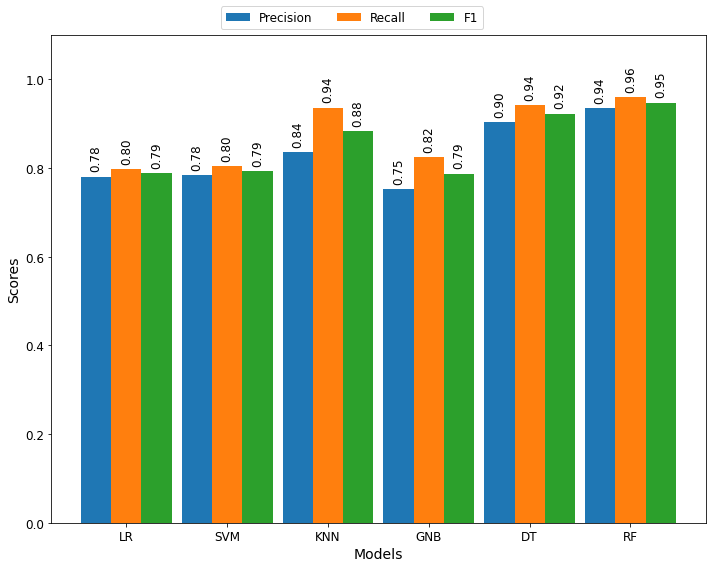

In [ ]:
# FOR LABEL ENCODED DATA
models = ['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF']

le_precisions = [le_prec_log, le_prec_svm, le_prec_knn, le_prec_gnb, le_prec_dt, le_prec_rf]
le_recalls = [le_rec_log, le_rec_svm, le_rec_knn, le_rec_gnb, le_rec_dt, le_rec_rf]
le_f1s = [le_f1_log, le_f1_svm, le_f1_knn, le_f1_gnb, le_f1_dt, le_f1_rf]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.30  

x_indices = np.arange(len(models)) 
x_indices2 = [x + width for x in x_indices]
x_indices3 = [x + width for x in x_indices2]

fig, ax = plt.subplots(figsize=(10,8))
bar1 = ax.bar(x_indices, le_precisions, width, label='Precision')
bar2 = ax.bar(x_indices2, le_recalls, width, label='Recall')
bar3 = ax.bar(x_indices3, le_f1s, width, label='F1')

ax.set_ylim([0, 1.1])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x_indices2)
ax.set_xticklabels(models)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25,1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
plt.show()

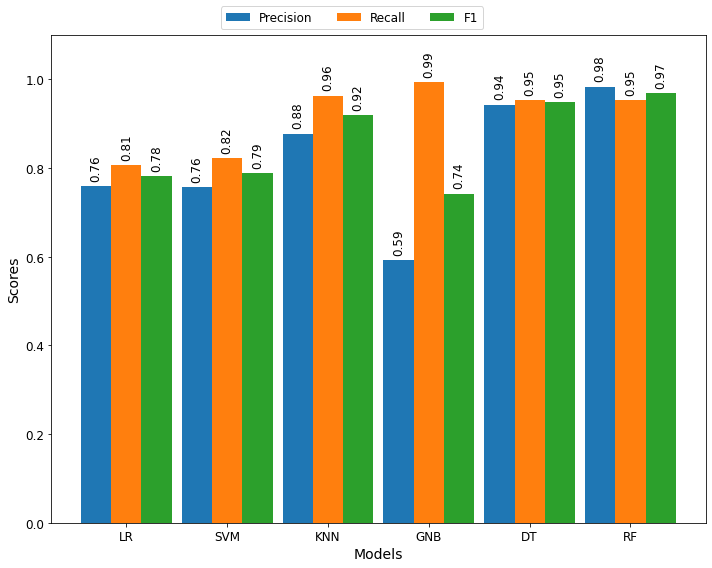

In [ ]:
# FOR ONE-HOT ENCODED DATA
models = ['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF']

ohe_precisions = [ohe_prec_log, ohe_prec_svm, ohe_prec_knn, ohe_prec_gnb, ohe_prec_dt, ohe_prec_rf]
ohe_recalls = [ohe_rec_log, ohe_rec_svm, ohe_rec_knn, ohe_rec_gnb, ohe_rec_dt, ohe_rec_rf]
ohe_f1s = [ohe_f1_log, ohe_f1_svm, ohe_f1_knn, ohe_f1_gnb, ohe_f1_dt, ohe_f1_rf]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.30  

x_indices = np.arange(len(models)) 
x_indices2 = [x + width for x in x_indices]
x_indices3 = [x + width for x in x_indices2]

fig, ax = plt.subplots(figsize=(10,8))
bar1 = ax.bar(x_indices, ohe_precisions, width, label='Precision')
bar2 = ax.bar(x_indices2, ohe_recalls, width, label='Recall')
bar3 = ax.bar(x_indices3, ohe_f1s, width, label='F1')

ax.set_ylim([0, 1.1])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x_indices2)
ax.set_xticklabels(models)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25,1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
plt.show()

- Accuracy comparison among all the models

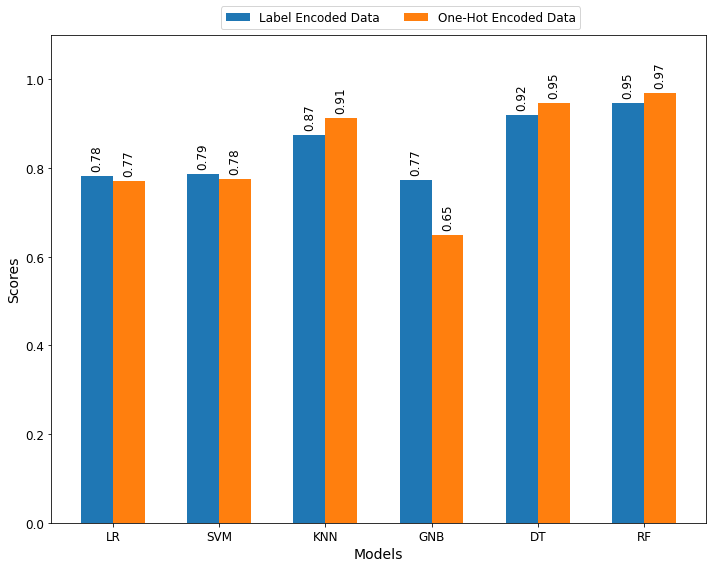

In [ ]:
# Accuracy Bar Chart
models = ['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF']

le_accuracy_scores = [le_acc_log, le_acc_svm, le_acc_knn, le_acc_gnb, le_acc_dt, le_acc_rf]
ohe_accuracy_scores = [ohe_acc_log, ohe_acc_svm, ohe_acc_knn, ohe_acc_gnb, ohe_acc_dt, ohe_acc_rf]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

        
width = 0.30  

x_indices = np.arange(len(models)) 
x_indices2 = [x + width for x in x_indices]

fig, ax = plt.subplots(figsize=(10,8))
bar1 = ax.bar(x_indices, le_accuracy_scores, width, label='Label Encoded Data')
bar2 = ax.bar(x_indices2, ohe_accuracy_scores, width, label='One-Hot Encoded Data')

ax.set_ylim([0, 1.1])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x_indices+(width/2))
ax.set_xticklabels(models)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25,1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()
plt.show()

## Findings
- The lowest correlated feature is **work-type** and the highest one is **age**. Morever, **hypertension, heart disease annd avg. glucose level** also showed some correlation.
- In the dataset, there were $201$ rows in the **bmi** columns that had **NaN** values which were discarded as the number of rows are neglible compared to the size of the whole dataset.
- The dataset is a highly imbalanced dataset consisting only $4.3\%$ of stroke cases. Hence, there is a possibility of getting a biased model. In fact, primary experimentation showed a biased output of recall $0.0$ for stroke cases which is not useful. Therefore, oversampling was used to balance the dataset.
- From the accuracy bar chart, it is seen that some models performed better for label encoded data and some model performed better for one-hot encoded data. However, the highest accuracy was obtained from **random forest** model for label encoded as well as one-hot encoded data which was expected as this is an ensemble learning method.

In [ ]:
# FOR SINGLE CLASSIFIER

# models = ['LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF']

# accuracy_scores = [le_acc_log, le_acc_svm, le_acc_knn, le_acc_gnb, le_acc_dt, le_acc_rf]

# fig, ax = plt.subplots(figsize=(10,8))
# ax.bar(models, accuracy_scores, color='#AA0C6B')

# for idx, value in enumerate(accuracy_scores):
#     plt.text(idx-0.1, value+0.01, s=f"{value:.2f}", fontsize='x-large')

# plt.title('Accuracy of All Models')
# plt.xlabel('Models')
# plt.ylabel('Accuracy (%)')
# plt.tight_layout()
# plt.show()